# Regression

- Linear regression
- ElasticNet
- decision tree regression
- Random forest regression


In [7]:
# We load the data
import pandas as pd

data_df = pd.read_csv("./data_regression.csv", index_col=["Id"])
data_df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
6             50       RL         85.0    14115   Pave   NaN      IR1   
7             20       RL         75.0    10084   Pave   NaN      Reg   
8             60       RL          NaN    10382   Pave   NaN      IR1   
9             50       RM         51.0     6120   Pave   NaN      Reg   
10           190       RL         50.0     7420   Pave   NaN      Reg   
11            20       RL         70.0    11200   Pave   NaN      Reg   
12            60       RL         85.0    11924   Pave   NaN      IR1   
13            20       RL          NaN    12968   Pave   NaN      IR2   
14            20       RL         91.0    10652   Pave   NaN      IR1   
15            20       RL          NaN    10920   Pave   NaN      IR1   
16            45       RM         51.0     6120   Pave   NaN      Reg   
17            20       RL          NaN    11241   Pave   NaN      IR1   
18            90       RL         72.0    10791   Pave   NaN      Reg   
19            20       RL         66.0    13695   Pave   NaN      Reg   
20            20       RL         70.0     7560   Pave   NaN      Reg   
21            60       RL        101.0    14215   Pave   NaN      IR1   
22            45       RM         57.0     7449   Pave  Grvl      Reg   
23            20       RL         75.0     9742   Pave   NaN      Reg   
24           120       RM         44.0     4224   Pave   NaN      Reg   
25            20       RL          NaN     8246   Pave   NaN      IR1   
26            20       RL        110.0    14230   Pave   NaN      Reg   
27            20       RL         60.0     7200   Pave   NaN      Reg   
28            20       RL         98.0    11478   Pave   NaN      Reg   
29            20       RL         47.0    16321   Pave   NaN      IR1   
30            30       RM         60.0     6324   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1431          60       RL         60.0    21930   Pave   NaN      IR3   
1432         120       RL          NaN     4928   Pave   NaN      IR1   
1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1434          60       RL         93.0    10261   Pave   NaN      IR1   
1435          20       RL         80.0    17400   Pave   NaN      Reg   
1436          20       RL         80.0     8400   Pave   NaN      Reg   
1437          20       RL         60.0     9000   Pave   NaN      Reg   
1438          20       RL         96.0    12444   Pave   NaN      Reg   
1439          20       RM         90.0     7407   Pave   NaN      Reg   
1440          60       RL         80.0    11584   Pave   NaN      Reg   
1441          70       RL         79.0    11526   Pave   NaN      IR1   
1442         120       RM          NaN     4426   Pave   NaN      Reg   
1443          60       FV         85.0    11003   Pave   NaN      Reg   
1444          30       RL          NaN     8854   Pave   NaN      Reg   
1445          20       RL         63.0     8500   Pave   NaN      Reg   
1446          85       RL         70.0     8400   Pave   NaN      Reg   
1447          20       RL          NaN    26142   Pave   NaN      IR1   
1448          60       RL         80.0    10000   Pave   NaN      Reg   
1449          50       RL         70.0    11767   Pave   NaN      Reg   
1450         180       RM         21.0     1533   Pave   NaN      Reg   
1451          90       RL         60.0     9000   Pave   NaN      Reg   
1452          20       RL         78.0     9262   Pave   NaN    

In [3]:
data_df.shape

(1460, 80)

## Data preparation

In [8]:
## Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder

col_cat = data_df.select_dtypes(include=[object]).columns
data_df_enc = data_df.copy()

for col in col_cat:
    le = LabelEncoder()
    
    data_df_enc[col] = le.fit_transform(data_df_enc[col])
        
data_df_enc

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1             60         3         65.0     8450       1      0         3   
2             20         3         80.0     9600       1    946         3   
3             60         3         68.0    11250       1    945         0   
4             70         3         60.0     9550       1    944         0   
5             60         3         84.0    14260       1    943         0   
6             50         3         85.0    14115       1    942         0   
7             20         3         75.0    10084       1    941         3   
8             60         3          NaN    10382       1    940         0   
9             50         4         51.0     6120       1    939         3   
10           190         3         50.0     7420       1    947         3   
11            20         3         70.0    11200       1    938         3   
12            60         3         85.0    11924       1    936         0   
13            20         3          NaN    12968       1    935         1   
14            20         3         91.0    10652       1    934         0   
15            20         3          NaN    10920       1    933         0   
16            45         4         51.0     6120       1    932         3   
17            20         3          NaN    11241       1    931         0   
18            90         3         72.0    10791       1    930         3   
19            20         3         66.0    13695       1    929         3   
20            20         3         70.0     7560       1    937         3   
21            60         3        101.0    14215       1    949         0   
22            45         4         57.0     7449       1   1369         3   
23            20         3         75.0     9742       1    959         3   
24           120         4         44.0     4224       1    950         3   
25            20         3          NaN     8246       1    968         0   
26            20         3        110.0    14230       1    967         3   
27            20         3         60.0     7200       1    966         3   
28            20         3         98.0    11478       1    965         3   
29            20         3         47.0    16321       1    964         0   
30            30         4         60.0     6324       1    963         0   
...          ...       ...          ...      ...     ...    ...       ...   
1431          60         3         60.0    21930       1    446         2   
1432         120         3          NaN     4928       1    445         0   
1433          30         3         60.0    10800       1   1369         3   
1434          60         3         93.0    10261       1    444         0   
1435          20         3         80.0    17400       1    443         3   
1436          20         3         80.0     8400       1    451         3   
1437          20         3         60.0     9000       1    463         3   
1438          20         3         96.0    12444       1    473         3   
1439          20         4         90.0     7407       1    464         3   
1440          60         3         80.0    11584       1    482         3   
1441          70         3         79.0    11526       1    481         0   
1442         120         4          NaN     4426       1    480         3   
1443          60         1         85.0    11003       1    479         3   
1444          30         3          NaN     8854       1    478         3   
1445          20         3         63.0     8500       1    477         3   
1446          85         3         70.0     8400       1    476         3   
1447          20         3          NaN    26142       1    475         0   
1448          60         3         80.0    10000       1    483         3   
1449          50         3         70.0    11767       1    474         3   
14

In [17]:
# We one-hot encoding
data_df_oh = pd.get_dummies(data_df, drop_first=True)
data_df_oh

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1             60         65.0     8450            7            5       2003   
2             20         80.0     9600            6            8       1976   
3             60         68.0    11250            7            5       2001   
4             70         60.0     9550            7            5       1915   
5             60         84.0    14260            8            5       2000   
6             50         85.0    14115            5            5       1993   
7             20         75.0    10084            8            5       2004   
8             60          NaN    10382            7            6       1973   
9             50         51.0     6120            7            5       1931   
10           190         50.0     7420            5            6       1939   
11            20         70.0    11200            5            5       1965   
12            60         85.0    11924            9            5       2005   
13            20          NaN    12968            5            6       1962   
14            20         91.0    10652            7            5       2006   
15            20          NaN    10920            6            5       1960   
16            45         51.0     6120            7            8       1929   
17            20          NaN    11241            6            7       1970   
18            90         72.0    10791            4            5       1967   
19            20         66.0    13695            5            5       2004   
20            20         70.0     7560            5            6       1958   
21            60        101.0    14215            8            5       2005   
22            45         57.0     7449            7            7       1930   
23            20         75.0     9742            8            5       2002   
24           120         44.0     4224            5            7       1976   
25            20          NaN     8246            5            8       1968   
26            20        110.0    14230            8            5       2007   
27            20         60.0     7200            5            7       1951   
28            20         98.0    11478            8            5       2007   
29            20         47.0    16321            5            6       1957   
30            30         60.0     6324            4            6       1927   
...          ...          ...      ...          ...          ...        ...   
1431          60         60.0    21930            5            5       2005   
1432         120          NaN     4928            6            6       1976   
1433          30         60.0    10800            4            6       1927   
1434          60         93.0    10261            6            5       2000   
1435          20         80.0    17400            5            5       1977   
1436          20         80.0     8400            6            9       1962   
1437          20         60.0     9000            4            6       1971   
1438          20         96.0    12444            8            5       2008   
1439          20         90.0     7407            6            7       1957   
1440          60         80.0    11584            7            6       1979   
1441          70         79.0    11526            6            7       1922   
1442         120          NaN     4426            6            5       2004   
1443          60         85.0    11003           10            5       2008   
1444          30          NaN     8854            6            6       1916   
1445          20         63.0     8500            7            5       2004   
1446          85         70.0     8400            6            5       1966   
1447          20          NaN    26142            5            7       1962   
1448          60         80.0    10000            8     

In [25]:
data_df_oh.fillna(data_df_oh.median(), inplace=True)
data_df_enc.fillna(data_df_enc.median(), inplace=True)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1             60         3         65.0     8450       1      0         3   
2             20         3         80.0     9600       1    946         3   
3             60         3         68.0    11250       1    945         0   
4             70         3         60.0     9550       1    944         0   
5             60         3         84.0    14260       1    943         0   
6             50         3         85.0    14115       1    942         0   
7             20         3         75.0    10084       1    941         3   
8             60         3         69.0    10382       1    940         0   
9             50         4         51.0     6120       1    939         3   
10           190         3         50.0     7420       1    947         3   
11            20         3         70.0    11200       1    938         3   
12            60         3         85.0    11924       1    936         0   
13            20         3         69.0    12968       1    935         1   
14            20         3         91.0    10652       1    934         0   
15            20         3         69.0    10920       1    933         0   
16            45         4         51.0     6120       1    932         3   
17            20         3         69.0    11241       1    931         0   
18            90         3         72.0    10791       1    930         3   
19            20         3         66.0    13695       1    929         3   
20            20         3         70.0     7560       1    937         3   
21            60         3        101.0    14215       1    949         0   
22            45         4         57.0     7449       1   1369         3   
23            20         3         75.0     9742       1    959         3   
24           120         4         44.0     4224       1    950         3   
25            20         3         69.0     8246       1    968         0   
26            20         3        110.0    14230       1    967         3   
27            20         3         60.0     7200       1    966         3   
28            20         3         98.0    11478       1    965         3   
29            20         3         47.0    16321       1    964         0   
30            30         4         60.0     6324       1    963         0   
...          ...       ...          ...      ...     ...    ...       ...   
1431          60         3         60.0    21930       1    446         2   
1432         120         3         69.0     4928       1    445         0   
1433          30         3         60.0    10800       1   1369         3   
1434          60         3         93.0    10261       1    444         0   
1435          20         3         80.0    17400       1    443         3   
1436          20         3         80.0     8400       1    451         3   
1437          20         3         60.0     9000       1    463         3   
1438          20         3         96.0    12444       1    473         3   
1439          20         4         90.0     7407       1    464         3   
1440          60         3         80.0    11584       1    482         3   
1441          70         3         79.0    11526       1    481         0   
1442         120         4         69.0     4426       1    480         3   
1443          60         1         85.0    11003       1    479         3   
1444          30         3         69.0     8854       1    478         3   
1445          20         3         63.0     8500       1    477         3   
1446          85         3         70.0     8400       1    476         3   
1447          20         3         69.0    26142       1    475         0   
1448          60         3         80.0    10000       1    483         3   
1449          50         3         70.0    11767       1    474         3   
14

In [26]:
## We split the data into train and test
from sklearn.model_selection import train_test_split
y = data_df_oh["SalePrice"]
X_oh =  data_df_oh.drop("SalePrice", 1)
X_enc =  data_df_enc.drop("SalePrice", 1)

X_oh_train, X_oh_test, X_enc_train, X_enc_test, y_train, y_test = train_test_split(X_oh,
                                                                                   X_enc,
                                                                                   y,
                                                                                   test_size=0.40,
                                                                                   random_state=42)

## Predictive modeling

In [28]:
## We use linear regression

from sklearn.linear_model import LinearRegression

rg = LinearRegression()
rg.fit(X_oh_train, y_train)
rg.predict(X_oh_test)

array([ 158096.97029803,  346575.27154833,   94888.5202942 ,
        181629.64912024,  331250.73151986,   76260.22283972,
        240032.50161552,  145830.0442101 ,   71877.93047168,
        150401.01703034,  147381.7897319 ,  106204.04932691,
         44682.7429455 ,  227361.36975592,  171407.06097246,
        134062.35254188,  185759.26730302,  121745.82191695,
        124974.07918045,  211664.77663067,  166463.89710591,
        203777.57473648,  180373.84336626,  137243.99079045,
        201900.23807713,  138800.22059102,  195326.08112493,
        112276.42101484,  175682.28795567,  193010.73429967,
        135160.71438259,  285079.04613329,  239012.92427609,
        104188.32684767,  241659.58986224,  147515.03384884,
        145862.90727172,  196200.38055092,  305588.6999177 ,
        132340.40223203,  123471.14952397,  216209.69258808,
        111041.80580112,  376652.35879204,  134890.90151446,
        121791.98238728,  102849.30534707,  144189.73066826,
        415633.96402177,

In [33]:
rg_oh = LinearRegression()
rg_oh.fit(X_oh_train, y_train)

rg_enc = LinearRegression()
rg_enc.fit(X_enc_train, y_train)


pred_df = pd.DataFrame({"target": y_test,
                        "prediction_oh": rg_oh.predict(X_oh_test), 
                        "prediction_enc": rg_enc.predict(X_enc_test)})
pred_df

prediction_enc  prediction_oh  target
Id                                         
893    149986.435508  158096.970298  154500
1106   294548.207120  346575.271548  325000
414    124236.151768   94888.520294  115000
523    177687.702256  181629.649120  159000
1037   307128.678637  331250.731520  315500
615     67068.598568   76260.222840   75500
219    241576.464950  240032.501616  311500
1161   136856.298675  145830.044210  146000
650     67936.544869   71877.930472   84500
888    162135.333768  150401.017030  135500
577    154094.452714  147381.789732  145000
1253   117781.108454  106204.049327  130000
1062    69683.034207   44682.742945   81000
568    208386.169167  227361.369756  214000
1109   164021.733948  171407.060972  181000
1114   139059.196089  134062.352542  134500
169    214643.593945  185759.267303  183500
1103   118303.388952  121745.821917  135000
1121   125012.650741  124974.079180  118400
68     229187.018562  211664.776631  226000
1041   150222.537242  166463.897106  155000
454    215167.059840  203777.574736  210000
671    194576.864148  180373.843366  173500
1095   126503.692556  137243.990790  129000
193    211063.785058  201900.238077  192000
124    159671.983536  138800.220591  153900
416    204144.442082  195326.081125  181134
278     75399.133803  112276.421015  141000
434    165075.752387  175682.287956  181000
1318   183738.183577  193010.734300  208900
...              ...            ...     ...
300    144533.976941  163110.593743  158500
1243   183924.469981  186269.376365  170000
706     83954.105875   95530.150801   55000
1236   109386.424277  138743.984928  138887
1356   202612.849769  173089.154777  170000
904    238473.882444  234619.251844  240000
830    170716.320625  149662.589958  147400
504    254701.266269  292618.545115  289000
1337   131722.858189  126823.527342  135000
4      179257.057619  154859.609263  140000
1314   299674.113727  311353.226978  333168
468    163458.505155  148833.820563  146500
322    306637.572618  338347.791723  354000
6      193184.381653  152256.630145  143000
1240   250702.696708  231348.250906  265900
1094   181126.190373  175525.773134  146000
716    170000.971634  145708.660561  165000
40      87297.284212  109124.946035   82000
543    207886.808282  230155.363637  213250
243     98109.252746   87003.249852   79000
137    120131.560912  124854.002278  143000
715    195770.606971  176232.839153  130500
738    240051.292555  232672.920887  239900
1302   150221.623684  165273.865797  177500
1044   252825.592365  249878.301634  262280
1331   263590.054483  225061.102869  227000
1104   164493.333138  164750.855745  159500
753    192868.917122  222804.495611  217000
1354   339457.875986  368719.046074  410000
377    130632.338607  146866.032755  148000

[584 rows x 3 columns]

In [34]:
(pred_df["target"] - pred_df["prediction_oh"]).pow(2).mean() ** 0.5

42431.43071374988

In [37]:
from sklearn import metrics

print metrics.mean_squared_error(pred_df["target"], pred_df["prediction_oh"]) ** 0.5
print metrics.mean_squared_error(pred_df["target"], pred_df["prediction_enc"]) ** 0.5

42431.4307137
37637.2105681


In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr_rg = LinearRegression()
en_rg = ElasticNet()
tree_rg = DecisionTreeRegressor()
RF_rg = RandomForestRegressor()

In [42]:
lr_rg.fit(X_enc_train, y_train)
en_rg.fit(X_enc_train, y_train)
tree_rg.fit(X_enc_train, y_train)
RF_rg.fit(X_enc_train, y_train)

pred_df = pd.DataFrame({"target": y_test,
                       "pred_lr": lr_rg.predict(X_enc_test),
                       "pred_EN": en_rg.predict(X_enc_test),
                       "pred_tree": tree_rg.predict(X_enc_test),
                       "pred_RF": RF_rg.predict(X_enc_test)}) 

pred_df

ValueError: shapes (584,245) and (79,) not aligned: 245 (dim 1) != 79 (dim 0)

In [41]:
pred_df.apply(lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5).sort_values(ascending=True)

target           0.000000
pred_RF      34444.412980
pred_EN      37614.888815
pred_lr      37637.210568
pred_tree    42189.317000
dtype: float64

In [43]:
lr_rg.fit(X_oh_train, y_train)
en_rg.fit(X_oh_train, y_train)
tree_rg.fit(X_oh_train, y_train)
RF_rg.fit(X_oh_train, y_train)

pred_df = pd.DataFrame({"target": y_test,
                       "pred_lr": lr_rg.predict(X_oh_test),
                       "pred_EN": en_rg.predict(X_oh_test),
                       "pred_tree": tree_rg.predict(X_oh_test),
                       "pred_RF": RF_rg.predict(X_oh_test)}) 

pred_df

pred_EN   pred_RF        pred_lr  pred_tree  target
Id                                                             
893   157691.041173  136550.0  158096.970298   173000.0  154500
1106  300440.171028  283840.0  346575.271548   235000.0  325000
414   101151.978762  120180.0   94888.520294   100000.0  115000
523   161701.495731  146600.0  181629.649120   152000.0  159000
1037  291334.323140  312507.8  331250.731520   277500.0  315500
615    57098.676726   82100.0   76260.222840    80000.0   75500
219   225638.666073  208322.5  240032.501616   201800.0  311500
1161  142927.404681  146885.8  145830.044210   148500.0  146000
650    54020.735803   82000.0   71877.930472    81000.0   84500
888   161464.072856  122060.0  150401.017030   141000.0  135500
577   134408.222985  171615.0  147381.789732   189950.0  145000
1253  111907.727142  112450.0  106204.049327   100000.0  130000
1062  102118.414872  108575.0   44682.742945    92900.0   81000
568   214564.857376  214768.0  227361.369756   192500.0  214000
1109  186774.008166  174970.0  171407.060972   175000.0  181000
1114  135919.058552  125060.0  134062.352542   139400.0  134500
169   209815.333787  195187.5  185759.267303   225000.0  183500
1103  136722.617344  131560.0  121745.821917   150750.0  135000
1121  110661.923176  121150.0  124974.079180   125000.0  118400
68    229180.219038  202960.0  211664.776631   206000.0  226000
1041  175605.598949  169975.0  166463.897106   172500.0  155000
454   211037.177443  237272.8  203777.574736   212000.0  210000
671   191837.692662  170020.0  180373.843366   186500.0  173500
1095  139482.891186  121500.0  137243.990790   117000.0  129000
193   213071.094522  201028.0  201900.238077   191000.0  192000
124   155184.754532  162389.0  138800.220591   152000.0  153900
416   205348.173661  192537.6  195326.081125   159895.0  181134
278    76385.568510  102090.0  112276.421015   112000.0  141000
434   173073.243798  177130.0  175682.287956   168000.0  181000
1318  183301.322971  198342.9  193010.734300   180500.0  208900
...             ...       ...            ...        ...     ...
300   149766.183643  140880.0  163110.593743   125000.0  158500
1243  168539.127520  165830.0  186269.376365    82500.0  170000
706    36572.249124  100340.0   95530.150801    80500.0   55000
1236  119961.034075  169380.0  138743.984928   139000.0  138887
1356  185834.471881  196050.0  173089.154777   219500.0  170000
904   246989.100716  224423.7  234619.251844   250000.0  240000
830   158498.236308  154620.4  149662.589958   151000.0  147400
504   238605.496604  220150.0  292618.545115   241500.0  289000
1337  147921.437643  148411.6  126823.527342   100000.0  135000
4     179617.248118  177030.0  154859.609263   165000.0  140000
1314  302719.700238  351439.6  311353.226978   466500.0  333168
468   161254.006302  158348.4  148833.820563   185000.0  146500
322   312342.486505  313307.7  338347.791723   290000.0  354000
6     185754.775508  168060.0  152256.630145   163500.0  143000
1240  239107.633578  270606.1  231348.250906   215000.0  265900
1094  184449.467202  152325.0  175525.773134   124000.0  146000
716   157912.964476  154070.0  145708.660561   140000.0  165000
40     79645.180881   95110.0  109124.946035    80500.0   82000
543   223358.104282  229172.8  230155.363637   227000.0  213250
243    91121.004611  112010.0   87003.249852   104900.0   79000
137   133198.383551  152490.0  124854.002278   154000.0  143000
715   187422.205992  195290.0  176232.839153   175000.0  130500
738   242262.852913  276370.0  232672.920887   255900.0  239900
1302  164689.339190  169180.0  165273.865797   210000.0  177500
1044  249051.497756  278250.0  249878.301634   229000.0  262280
1331  259657.110799  274019.2  225061.102869   244600.0  227000
1104  160575.119540  148225.0  164750.855745   125000.0  159500
753   210792.939568  194540.0  222804.495611   180500.0  217000
1354  346328.183717  332051.3  368719.046074   340000.0  410000
377   141754.230248  140900.0  146866.032755

In [44]:
pred_df.apply(lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5).sort_values(ascending=True)

target           0.000000
pred_RF      33120.420592
pred_EN      37104.632622
pred_lr      42431.430714
pred_tree    44344.479726
dtype: float64

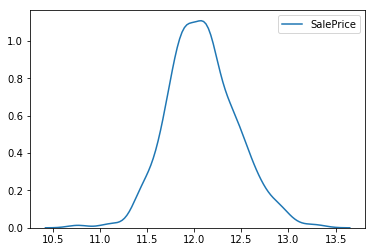

In [57]:
%matplotlib inline
import seaborn as sns
import numpy as np

sns.kdeplot(np.log(y_train + 10000))

In [61]:
import numpy as np

lr_rg.fit(X_enc_train, np.log(y_train + 1))
en_rg.fit(X_enc_train, np.log(y_train + 1))
tree_rg.fit(X_enc_train, np.log(y_train + 1))
RF_rg.fit(X_enc_train, np.log(y_train + 1))

pred_df = pd.DataFrame({"target": y_test,
                       "pred_lr": np.exp(lr_rg.predict(X_enc_test)) - 1,
                       "pred_EN": np.exp(en_rg.predict(X_enc_test))- 1,
                       "pred_tree": np.exp(tree_rg.predict(X_enc_test)) - 1,
                       "pred_RF": np.exp(RF_rg.predict(X_enc_test))- 1}) 

pred_df

pred_EN        pred_RF        pred_lr      pred_tree  target
Id                                                                      
893   131279.142877  139334.239233  150862.632112  145000.000000  154500
1106  303833.949477  306723.873419  301141.875338  290000.000000  325000
414   111615.554347  121214.413130  119616.793756  120000.000000  115000
523   144724.422005  150223.090589  172280.907709  185000.000000  159000
1037  271798.387130  325525.608055  304421.772520  320000.000000  315500
615    88660.958734   78603.170888   85890.125019   79000.000000   75500
219   181502.244439  222522.416877  244293.751442  214900.000000  311500
1161  154044.639041  146431.433478  144508.219010  148500.000000  146000
650    86827.392604   82150.555317   87679.013106   80000.000000   84500
888   130759.970100  111403.495061  149748.993366  132500.000000  135500
577   117958.329517  160372.869863  153230.212109  189950.000000  145000
1253  116454.310792  117398.911793  123637.672645  130000.000000  130000
1062  150630.726504  107711.345660   91598.816502  123000.000000   81000
568   183390.309084  213358.979274  196293.994911  174000.000000  214000
1109  196661.568214  174919.397473  166486.721206  175000.000000  181000
1114  130892.236683  123089.027294  135646.952026  110000.000000  134500
169   199217.844231  188655.494872  209228.836149  185000.000000  183500
1103  136186.001296  136980.127181  124531.661946  145000.000000  135000
1121  106980.458693  117420.242392  116072.042447  113000.000000  118400
68    214830.143488  199036.989018  217630.019303  179600.000000  226000
1041  188344.167980  162454.457564  153707.902630  180000.000000  155000
454   206633.836604  230875.843816  213180.380505  287090.000000  210000
671   175645.777607  176260.283720  185983.603491  200000.000000  173500
1095  133158.368201  122061.261028  136346.024568  117000.000000  129000
193   204141.408919  195272.435660  204119.835559  179949.993054  192000
124   160430.642596  171382.667032  149573.315738  158000.000000  153900
416   186130.757468  181969.091501  198914.098992  164990.000000  181134
278   115102.596120  118478.004212   98773.280052  112500.000000  141000
434   187172.224873  173076.149077  173154.699975  165150.000000  181000
1318  183518.561653  199121.827288  188195.731188  206000.000000  208900
...             ...            ...            ...            ...     ...
300   142182.647730  144135.000527  150242.404009  124000.000000  158500
1243  154416.819832  155769.347853  176452.505395  152000.000000  170000
706    74309.236820   87770.803348   72265.708776  106250.000000   55000
1236  115736.339390  139410.094769  110610.392287  177000.000000  138887
1356  180560.284845  196604.197241  202421.957658  198500.000000  170000
904   240654.685832  240702.825669  240433.786362  240000.000000  240000
830   142965.932815  151173.274728  172352.823057  151000.000000  147400
504   210266.416686  251399.254554  254843.119600  259000.000000  289000
1337  163730.084384  132199.101957  134879.586853  148000.000000  135000
4     150998.597139  178794.997164  164743.817397  165000.000000  140000
1314  325786.383962  331791.502159  327050.867373  625000.000000  333168
468   154616.979796  153118.812112  152810.062014  137450.000000  146500
322   316525.799325  326734.440059  313096.802619  325300.000000  354000
6     177667.640300  142598.370633  184049.691389  144000.000000  143000
1240  207058.438813  248625.982185  232686.704997  215000.000000  265900
1094  173307.984959  143975.056324  164928.399637  124000.000000  146000
716   154381.507945  163420.609254  156962.382143  152000.000000  165000
40     97862.996560   96168.854172   79076.224929  106250.000000   82000
543   220780.383653  217675.970363  209031.931044  240000.000000  213250
243   107972.511986  115685.537756   96304.058362   88000.000000   79000
137   142663.810359  157733.347134  128576.987420  157900.000000  143000
715   157328.319525  167855.721960  188820.635958  187500.000000  1305

In [62]:
pred_df.apply(lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5).sort_values(ascending=True)

target           0.000000
pred_lr      31190.470426
pred_RF      33548.184936
pred_EN      35679.823038
pred_tree    48997.087290
dtype: float64

In [65]:
lr_rg.fit(X_oh_train, np.log(y_train + 1))
en_rg.fit(X_oh_train, np.log(y_train + 1))
tree_rg.fit(X_oh_train, np.log(y_train + 1))
RF_rg.fit(X_oh_train, np.log(y_train + 1))

pred_df = pd.DataFrame({"target": y_test,
                       "pred_lr": np.exp(lr_rg.predict(X_oh_test)) - 1,
                       "pred_EN": np.exp(en_rg.predict(X_oh_test)) - 1,
                       "pred_tree": np.exp(tree_rg.predict(X_oh_test)) - 1,
                       "pred_RF": np.exp(RF_rg.predict(X_oh_test)) - 1}) 

pred_df

pred_EN        pred_RF        pred_lr  pred_tree  target
Id                                                                  
893   141693.697304  137535.976903  152508.564770   148000.0  154500
1106  301667.350617  300344.783412  350259.870857   278000.0  325000
414   106216.452645  119632.632357  105000.052391   162000.0  115000
523   139403.916964  151196.799003  166327.636435   185000.0  159000
1037  263673.830186  318071.348260  319902.823794   285000.0  315500
615    92441.254517   79815.736741   82360.904406    79000.0   75500
219   176480.448949  200915.377759  253969.924107   219500.0  311500
1161  146867.000100  149980.758669  145706.239111   149000.0  146000
650    89956.827385   87364.774333   79060.353724    81000.0   84500
888   143357.119389  129210.180531  138505.039441   139000.0  135500
577   113177.640617  156656.508183  148522.107162   189950.0  145000
1253  117636.603781  120390.461134  116484.583108   100000.0  130000
1062  144390.460059  107281.289221   57049.847032   105000.0   81000
568   201604.050820  203446.563038  215654.845351   193000.0  214000
1109  190383.357510  177419.971407  173152.805701   175000.0  181000
1114  130245.308687  129328.511500  133133.459114   132000.0  134500
169   193518.004099  191983.495919  188237.306753   195000.0  183500
1103  136698.774909  129192.922443  131837.538556   148000.0  135000
1121  101583.567701  113533.847703  105366.968809   113000.0  118400
68    209848.853148  203324.941561  211533.530865   210000.0  226000
1041  183476.596979  171517.143710  162332.125533   175000.0  155000
454   202672.387854  203683.135959  202913.151589   270000.0  210000
671   186883.467317  187217.881819  174693.683652   173900.0  173500
1095  134985.342474  117886.744491  140123.366201   117000.0  129000
193   200156.116809  195427.512925  199445.449123   200141.0  192000
124   160384.145534  165450.998384  145318.190130   162000.0  153900
416   182935.309018  178551.332844  190672.370625   164990.0  181134
278   111595.713245  107715.097523  113904.437788   103000.0  141000
434   181169.293033  181808.805165  181719.233835   178000.0  181000
1318  176492.770519  186284.680840  199225.267123   171750.0  208900
...             ...            ...            ...        ...     ...
300   136667.474873  145740.972650  163382.665812   132000.0  158500
1243  147149.276261  153489.358143  178687.189615    82500.0  170000
706    79818.822107   87373.310955   73912.903778    96500.0   55000
1236  121756.089354  147968.112244  124953.512590   165000.0  138887
1356  175720.637092  208312.137248  185302.743613   194500.0  170000
904   235059.411965  226312.913297  229765.237306   205000.0  240000
830   155591.872416  152353.778509  158601.486132   151000.0  147400
504   207184.771078  236088.447181  297277.458943   221000.0  289000
1337  173499.690166  139127.938892  126731.601484   110000.0  135000
4     144578.845329  165276.917403  162596.016655   171900.0  140000
1314  328438.334816  352969.710944  317864.570854   412500.0  333168
468   150667.423697  184114.586109  146992.359583   169500.0  146500
322   311989.472612  313024.081219  345317.612882   285000.0  354000
6     169586.038171  148531.577120  144465.824872   159000.0  143000
1240  201381.969053  256237.188307  229191.776701   215000.0  265900
1094  175494.405579  138136.563087  165801.239198   142000.0  146000
716   151770.101576  155582.291872  146316.755175   152000.0  165000
40     94697.948936   96613.107594   69891.695407    96500.0   82000
543   216805.775520  215249.928772  226256.209829   205000.0  213250
243   105388.397890  106050.238728   99505.531246   117000.0   79000
137   137004.828064  146988.070043  135928.836502   157000.0  143000
715   170062.978754  178473.805642  180742.597755   185000.0  130500
738   225551.201718  237266.167321  226191.364335   248000.0  239900
1302  129874.776982  155545.302258  163225.847451   188700.0  177500
1044  249074.781132  248010.554889  244678.390467   295000.0  262280
1331  2392

In [66]:
pred_df.apply(lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5).sort_values(ascending=True)

target           0.000000
pred_lr      24656.142992
pred_RF      32459.801282
pred_EN      35805.526631
pred_tree    47743.282523
dtype: float64